# Testing Pytorch based pre-trained Mobilenet_SSD model to detect humans and converting it into the ONNX format

* This is a guide for the users of the humann detection exercise wishing to use a PyTorch based model.
* In the next section, I would be Fine Tuning the same model to detect some custom object. For the user, this custom object would be humans.
* I am using an open-source repo which contains the required code to automate the process of downloading the dataset, fine tuning and testing.
* We would be cloning my forked version of the repo as it contains some changes required in the ONNX conversion file.



In [ ]:
# Cloning the git hub repo\
! git clone https://github.com/shashwat623/pytorch-ssd


Cloning into 'pytorch-ssd'...
remote: Enumerating objects: 869, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 869 (delta 32), reused 0 (delta 0), pack-reused 812
Receiving objects: 100% (869/869), 1.07 MiB | 8.33 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
# Switching to cloned repo
% cd pytorch-ssd/

/content/pytorch-ssd/pytorch-ssd/pytorch-ssd


In [ ]:
# Downloading the state dictionary of the pre-trained ssd_mobilenetV1 model implemented via PyTorch
! wget -P models https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth

--2021-06-27 08:37:37--  https://storage.googleapis.com/models-hao/mobilenet-v1-ssd-mp-0_675.pth
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.234.128, 108.177.112.128, 74.125.124.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.234.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37995286 (36M) [application/octet-stream]
Saving to: ‘models/mobilenet-v1-ssd-mp-0_675.pth’

mobilenet-v1-ssd-mp 100%[===================>]  36.23M  52.6MB/s    in 0.7s    

2021-06-27 08:37:38 (52.6 MB/s) - ‘models/mobilenet-v1-ssd-mp-0_675.pth’ saved [37995286/37995286]



In [ ]:
# Downloading the label file of the pre-trained ssd_mobilenet model
! wget -P models https://storage.googleapis.com/models-hao/voc-model-labels.txt

--2021-06-27 08:37:38--  https://storage.googleapis.com/models-hao/voc-model-labels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 142.250.148.128, 209.85.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 145 [text/plain]
Saving to: ‘models/voc-model-labels.txt’

voc-model-labels.tx 100%[===================>]     145  --.-KB/s    in 0s      

2021-06-27 08:37:39 (27.9 MB/s) - ‘models/voc-model-labels.txt’ saved [145/145]



In [ ]:
# ckecking them out
! ls models/

EMPTY  mobilenet-v1-ssd-mp-0_675.pth  voc-model-labels.txt


In [ ]:
# Downloading a sample human image to test
! wget -O test_image.jpg https://geektech.me/wp-content/uploads/2020/01/38ea7360284c11d2d46550a4d0e86060.jpg

--2021-06-27 08:37:39--  https://geektech.me/wp-content/uploads/2020/01/38ea7360284c11d2d46550a4d0e86060.jpg
Resolving geektech.me (geektech.me)... 104.21.0.88, 172.67.150.199, 2606:4700:3031::6815:58, ...
Connecting to geektech.me (geektech.me)|104.21.0.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 101716 (99K) [image/jpeg]
Saving to: ‘test_image.jpg’

test_image.jpg      100%[===================>]  99.33K  --.-KB/s    in 0.1s    

2021-06-27 08:37:40 (916 KB/s) - ‘test_image.jpg’ saved [101716/101716]



In [ ]:
# Running the code to perform inference
# The arguments are as follows:
# "mb1-ssd" - Specifying the type of network. This is to specify that the state dictionary downloaded above will be loaded onto this network architecture, which is defined in the code.
# "models/mobilenet-v1-ssd-mp-0_675.pth" - The path to the pre trained model state dictionary downloaded above
# "models/voc-model-labels.txt" - Path to the label file of the model
! python run_ssd_example.py mb1-ssd models/mobilenet-v1-ssd-mp-0_675.pth models/voc-model-labels.txt ./test_image.jpg


Inference time:  0.11427903175354004
Found 3 objects. The output image is run_ssd_example_output.jpg


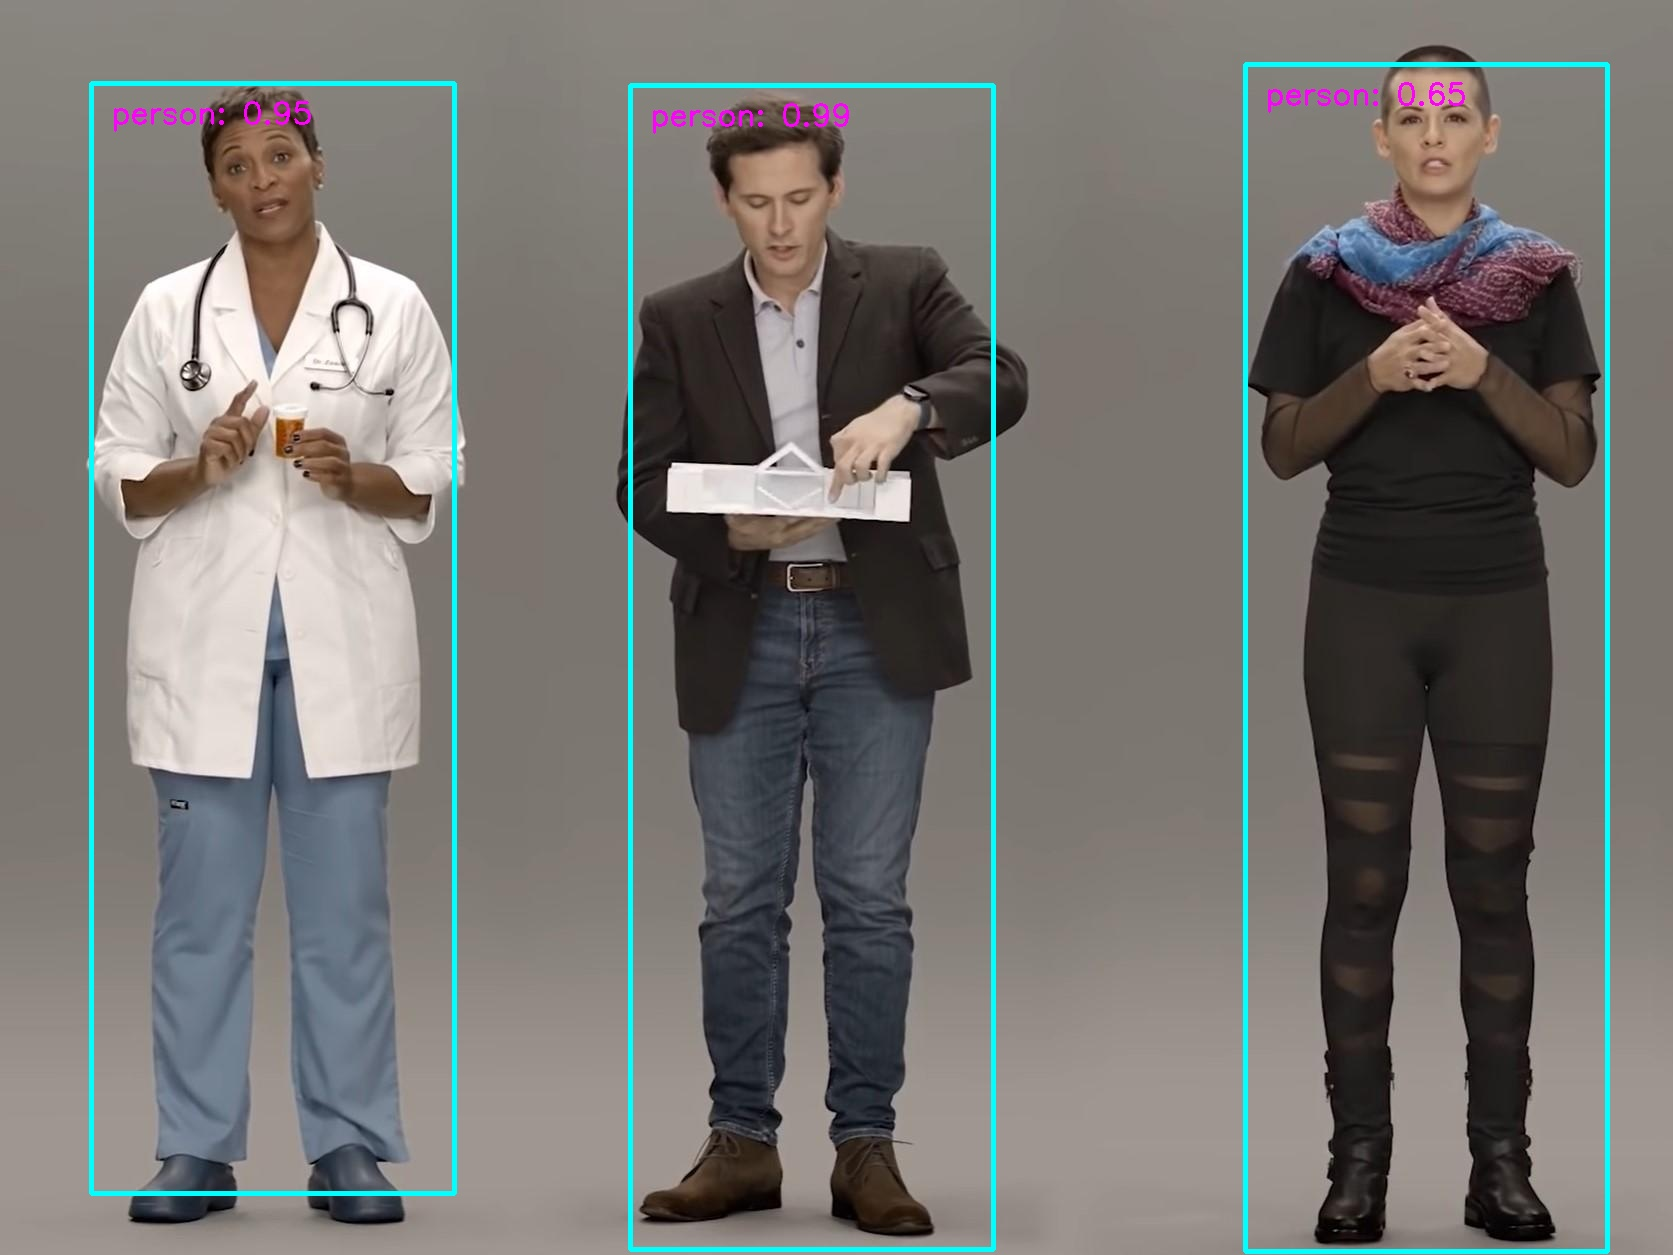

In [ ]:
# Displaying the output image
from IPython.display import Image
Image('run_ssd_example_output.jpg')

### Exporting the model to ONNX format


*   We would need both the above state dictionary and the model architecture definition to convert into onnx format. This is because the above downloaded .pth file only contains the state dictionary and not the architecture.
*   The code to convert this model into onnx format contains the required model definition. This is why we also pass the network type as an argument.




In [ ]:
! pip install onnx==1.8.1

# Exporting the model to ONNX format
! python convert_to_caffe2_models.py mb1-ssd models/mobilenet-v1-ssd-mp-0_675.pth models/voc-model-labels.txt


onnx model saved at:  models/mb1-ssd.onnx


In [ ]:
# downloading the converted onnx model to the local machine
from google.colab import files
files.download("./models/mb1-ssd.onnx") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Fine tuning on custom dataset

*   I would now be fine tuning the above model to detect a custom object.
*   I would be using the open_image dataset
* The open_images_downloader.py file in the repo can be used for that. It automates the process and gives the functionality to only download specific classes.
* It will download data into the folder ~/data/open_images. You can change that.
* Right now I am testing for TIGER class in the dataset as it is relatively small and thus takes less time for training. The user can replace the class with "person" or "human". Here is the [link](https://www.kaggle.com/thanatoz/understanding-open-image-v5-classes-hierarchy) for all the classes present in the dataset.




In [ ]:
! pip install boto3

     |████████████████████████████████| 133kB 6.3MB/s 
     |████████████████████████████████| 7.7MB 8.4MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 143kB 43.0MB/s 
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.6 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
# Downloading the custom dataset
! python open_images_downloader.py --root ~/data/open_images --class_names "Tiger" --num_workers 20


2021-06-27 08:52:12,433 - root - Download https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv.
2021-06-27 08:52:12,736 - root - Download https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv.
2021-06-27 08:52:25,409 - root - Read annotation file /root/data/open_images/train-annotations-bbox.csv
2021-06-27 08:52:49,122 - root - train bounding boxes size: 1260
2021-06-27 08:52:49,122 - root - Approximate Image Stats: 
2021-06-27 08:52:49,126 - root - Tiger: 1039/1039 = 1.00.
2021-06-27 08:52:49,127 - root - Label distribution: 
2021-06-27 08:52:49,127 - root - Tiger: 1260/1260 = 1.00.
2021-06-27 08:52:49,128 - root - Shuffle dataset.
2021-06-27 08:52:49,128 - root - Save train data to /root/data/open_images/sub-train-annotations-bbox.csv.
2021-06-27 08:52:49,143 - root - Download https://storage.googleapis.com/openimages/2018_04/validation/validation-annotations-bbox.csv.
2021-06-27 08:52:49,679 - root - Read annotation file /root

In [ ]:
# checking the downloaded data
! ls ~/data/open_images

class-descriptions-boxable.csv	     test-annotations-bbox.csv
sub-test-annotations-bbox.csv	     train
sub-train-annotations-bbox.csv	     train-annotations-bbox.csv
sub-validation-annotations-bbox.csv  validation
test				     validation-annotations-bbox.csv


# Retraining or Fine Tuning the model to detect class "Tiger"


Here are some of the options the user can play around with while fine tuning as part of the exercise.

User can freeze the base net, or all the layers except the prediction heads.
```
--freeze_base_net      Freeze base net layers.
--freeze_net          Freeze all the layers except the prediction head.
```

User can also use different learning rates for the base net, the extra layers and the prediction heads.
```
--lr LR, --learning-rate LR
--base_net_lr BASE_NET_LR (initial learning rate for base net.)
--extra_layers_lr EXTRA_LAYERS_LR
```

As subsets of open images data can be very unbalanced, it also provides a handy option to roughly balance the data.
```
  --balance_data        Balance training data by down-sampling more frequent
                        labels.
```

User can also set the number of epochs and batch size.
```
--num_epochs N  
--batch_size N
```



In [ ]:
# Retraining or Fine Tuning the model to detect class "Tiger"
! python train_ssd.py --dataset_type open_images --datasets ~/data/open_images --net mb1-ssd --pretrained_ssd models/mobilenet-v1-ssd-mp-0_675.pth --scheduler cosine --lr 0.01 --t_max 100 --validation_epochs 5 --num_epochs 3 --base_net_lr 0.001  --batch_size 5


2021-06-27 09:05:12,763 - root - INFO - Namespace(balance_data=False, base_net=None, base_net_lr=0.001, batch_size=5, checkpoint_folder='models/', dataset_type='open_images', datasets=['/root/data/open_images'], debug_steps=100, extra_layers_lr=None, freeze_base_net=False, freeze_net=False, gamma=0.1, lr=0.01, mb2_width_mult=1.0, milestones='80,100', momentum=0.9, net='mb1-ssd', num_epochs=3, num_workers=4, pretrained_ssd='models/mobilenet-v1-ssd-mp-0_675.pth', resume=None, scheduler='cosine', t_max=100.0, use_cuda=True, validation_dataset=None, validation_epochs=5, weight_decay=0.0005)
2021-06-27 09:05:12,764 - root - INFO - Prepare training datasets.
2021-06-27 09:05:13,523 - root - INFO - Dataset Summary:Number of Images: 1039
Minimum Number of Images for a Class: -1
Label Distribution:
	Tiger: 1260
2021-06-27 09:05:13,525 - root - INFO - Stored labels into file models/open-images-model-labels.txt.
2021-06-27 09:05:13,525 - root - INFO - Train dataset size: 1039
/usr/local/lib/pytho

In [ ]:
# Checking out the saved Fine Tuned model - "mb1-ssd-Epoch-2-Loss-2.0025541285673776.pth"
! ls models/

EMPTY					     mobilenet-v1-ssd-mp-0_675.pth
mb1-ssd-Epoch-0-Loss-2.148343841234843.pth   open-images-model-labels.txt
mb1-ssd-Epoch-2-Loss-2.0025541285673776.pth  voc-model-labels.txt
mb1-ssd.onnx


In [ ]:
# Checking the contents of "open-images-model-labels.txt", which was generated after fine tuning the model.
# We expext it to contain just the Tiger class.
!cat models/open-images-model-labels.txt

BACKGROUND
Tiger

In [ ]:
# Testing the model on a sample tiger image

! wget https://images.newindianexpress.com/uploads/user/imagelibrary/2020/6/2/w900X450/tiger.jpg
! python run_ssd_example.py mb1-ssd models/mb1-ssd-Epoch-2-Loss-2.0025541285673776.pth models/open-images-model-labels.txt tiger.jpg



--2021-06-27 09:38:41--  https://images.newindianexpress.com/uploads/user/imagelibrary/2020/6/2/w900X450/tiger.jpg
Resolving images.newindianexpress.com (images.newindianexpress.com)... 13.249.137.45, 13.249.137.97, 13.249.137.13, ...
Connecting to images.newindianexpress.com (images.newindianexpress.com)|13.249.137.45|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86489 (84K) [image/jpeg]
Saving to: ‘tiger.jpg’

tiger.jpg           100%[===================>]  84.46K   212KB/s    in 0.4s    

2021-06-27 09:38:43 (212 KB/s) - ‘tiger.jpg’ saved [86489/86489]

Inference time:  0.11327338218688965
Found 1 objects. The output image is run_ssd_example_output.jpg


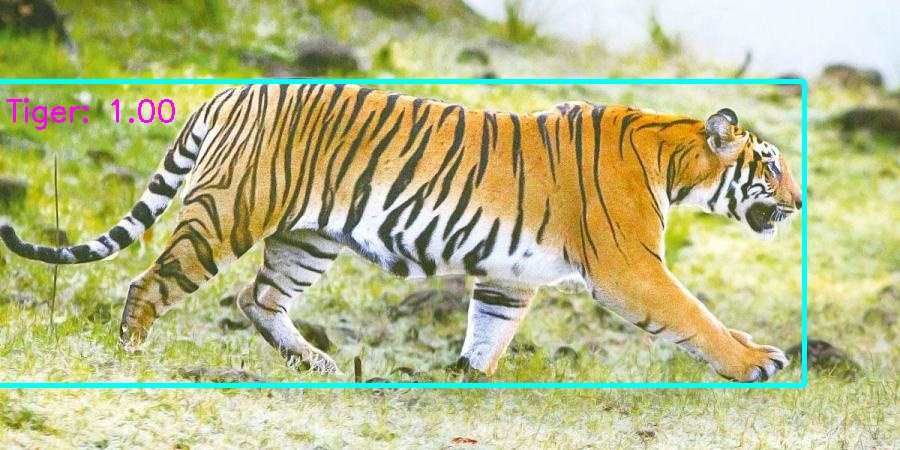

In [ ]:
# Displaying the output image
from IPython.display import Image
Image('run_ssd_example_output.jpg')

### Converting the Fine Tuned model to ONNX format

In [ ]:
! python convert_to_caffe2_models.py mb1-ssd models/mb1-ssd-Epoch-2-Loss-2.0025541285673776.pth models/open-images-model-labels.txt 


onnx model saved at:  models/mb1-ssd.onnx


In [ ]:
# Downloading the ONNX model to local machine
from google.colab import files
files.download("./models/mb1-ssd.onnx") 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>